<span style="color: coral;">

# HEART FAILURE PREDICTION WITH DIFFERENT CLASSIFICATION TECHNIQUES
</span>

#### BY CHINEDU IFEDIORAH

### Problem Statement

<span style="line-height: 2;">
Cardiovascular diseases (CVDs) stand as the leading cause of global mortality, claiming an estimated 17.9 million lives annually, constituting 31% of all global deaths. Heart failure, a common consequence of CVDs, underscores the urgency for early detection and management, particularly in individuals with cardiovascular disease or high cardiovascular risk factors (such as hypertension, diabetes, hyperlipidemia, or existing diseases). Utilizing machine learning models proves instrumental in addressing this need. By automating the identification and management of cardiovascular issues, I employ AI techniques to proactively tackle this problem.
</span>

### AIM

<span style="line-height: 2;">
TO PREDICT WHETHER A PATIENT IS PRONE TO HEART FAILURE DEPENDING ON MULTIPLE ATTRIBUTES
</span>

### DATASET FEATURES

1. <span style="line-height: 2;">**Age:** Age of the patient [years]</span>
2. <span style="line-height: 2;">**Sex:** Sex of the patient [M: Male, F: Female]</span>
3. <span style="line-height: 2;">**ChestPainType:** Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</span>
4. <span style="line-height: 2;">**RestingBP:** Resting blood pressure [mm Hg]</span>
5. <span style="line-height: 2;">**Cholesterol:** Serum cholesterol [mm/dl]</span>
6. <span style="line-height: 2;">**FastingBS:** Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</span>
7. <span style="line-height: 2;">**RestingECG:** Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</span>
8. <span style="line-height: 2;">**MaxHR:** Maximum heart rate achieved [Numeric value between 60 and 202]</span>
9. <span style="line-height: 2;">**ExerciseAngina:** Exercise-induced angina [Y: Yes, N: No]</span>
10. <span style="line-height: 2;">**Oldpeak:** Oldpeak = ST [Numeric value measured in depression]</span>
11. <span style="line-height: 2;">**ST_Slope:** The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</span>
12. <span style="line-height: 2;">**HeartDisease:** Output class [1: heart disease, 0: Normal]</span>


<span style="color: cyan;">

### EXPLORATORY DATA ANALYSIS (EDA)
</span>

In [62]:
#install pandas
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

7126.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7131.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7137.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
7143.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 720.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 781.6 kB/s eta 0:00:0000:0100:02


In [2]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#global settings
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
# check the dimension of the dataframe
df.shape

(918, 12)

In [5]:
# see columns in dataframe
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
#see info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
#see if there's any null values in the dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

##### No null values in the dataset

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


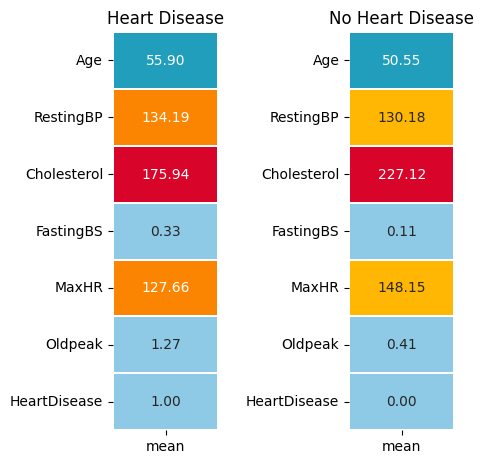

In [9]:
#mean value for all features for Heart Disease and No Heart Disease

yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T

colors = ['#8ECAE6','#219EBC', '#023047', '#FFB703', '#FB8500', '#D90429']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linecolor='white', linewidths=0.3, cbar=False, fmt='.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linecolor='white', linewidths=0.3, cbar=False, fmt='.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad = 2)

In [10]:
#see all unique features in the dataset
col = list(df.columns)
for i in col:
    print(i, 'unique number :', len(df[i].unique()))


Age unique number : 50
Sex unique number : 2
ChestPainType unique number : 4
RestingBP unique number : 67
Cholesterol unique number : 222
FastingBS unique number : 2
RestingECG unique number : 3
MaxHR unique number : 119
ExerciseAngina unique number : 2
Oldpeak unique number : 53
ST_Slope unique number : 3
HeartDisease unique number : 2


#### This shows that no categorical variable is greater than 5

In [11]:
# Divide features into numerical and categorical

col = list(df.columns)

categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 5:
        numerical_features.append(i)
    else: 
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [56]:
# Ecoding categorical features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0


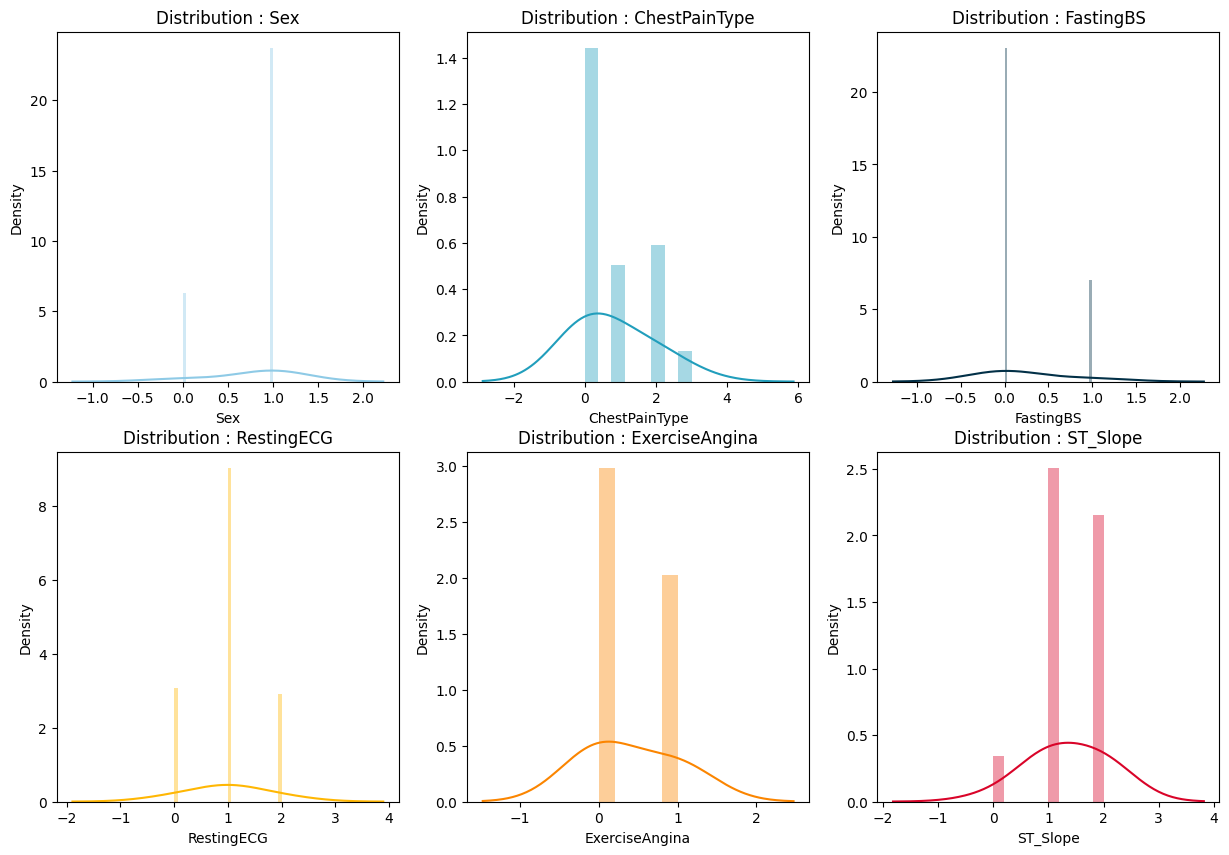

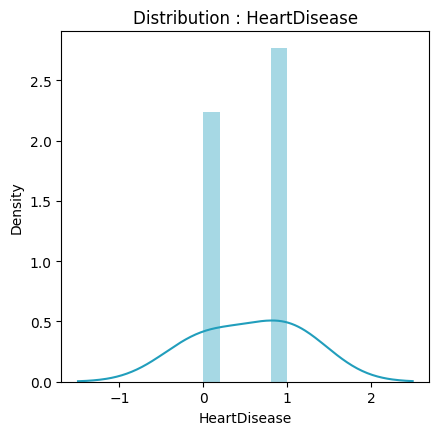

In [75]:
#plot the distribution of the categorical features

fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(15, 10))

for i in range(len(categorical_features) - 1):
    plt.subplot(2, 3, i+1)
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=colors[i])
    plt.title('Distribution : ' + categorical_features[i])

plt.figure(figsize = (4.75,4.55))
sns.distplot(df[categorical_features[len(categorical_features) - 1]], kde_kws = {'bw' : 1}, color = colors[1])
plt.title('Distribution : ' + categorical_features[len(categorical_features) - 1]);

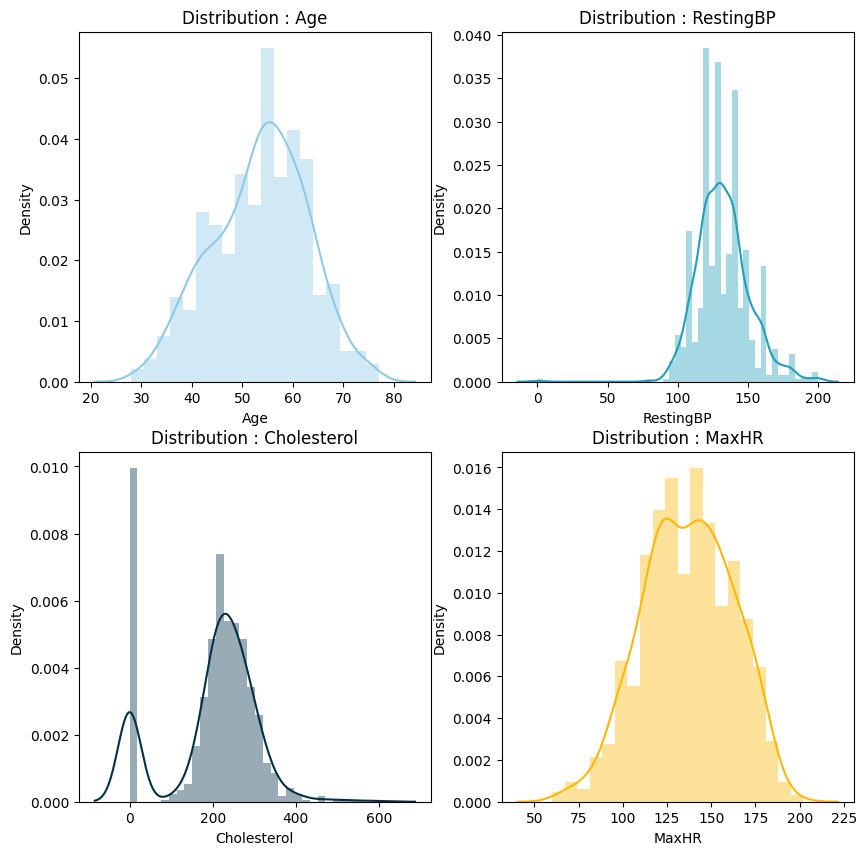

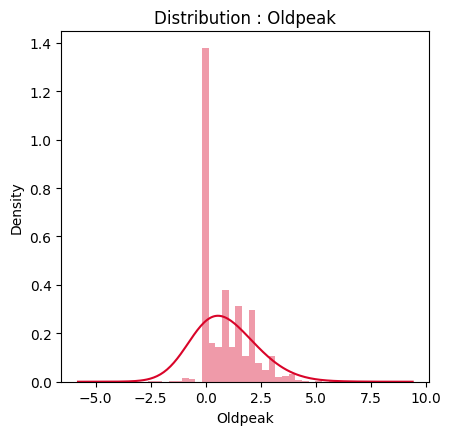

In [13]:
# Distribution of Numerical Features
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[i])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[5])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);


#### Target Variable Visualization (HeartDisease)

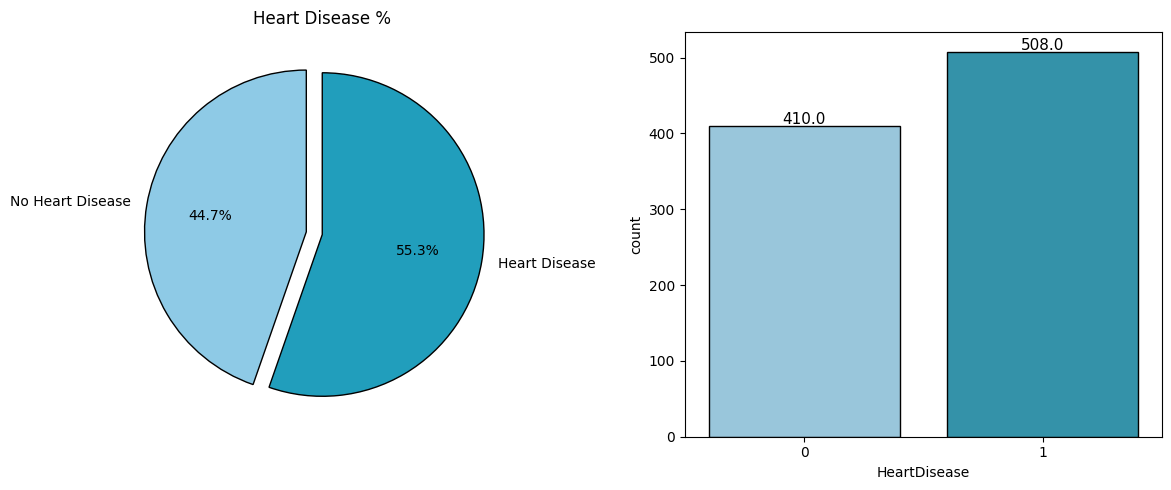

In [19]:
l = list(df1['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

# Plot countplot for 'HeartDisease'
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='black')

# Add annotations to the countplot
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)

plt.tight_layout()
plt.show()

#### Categorical Features vs Target Variable (HeartDisease)

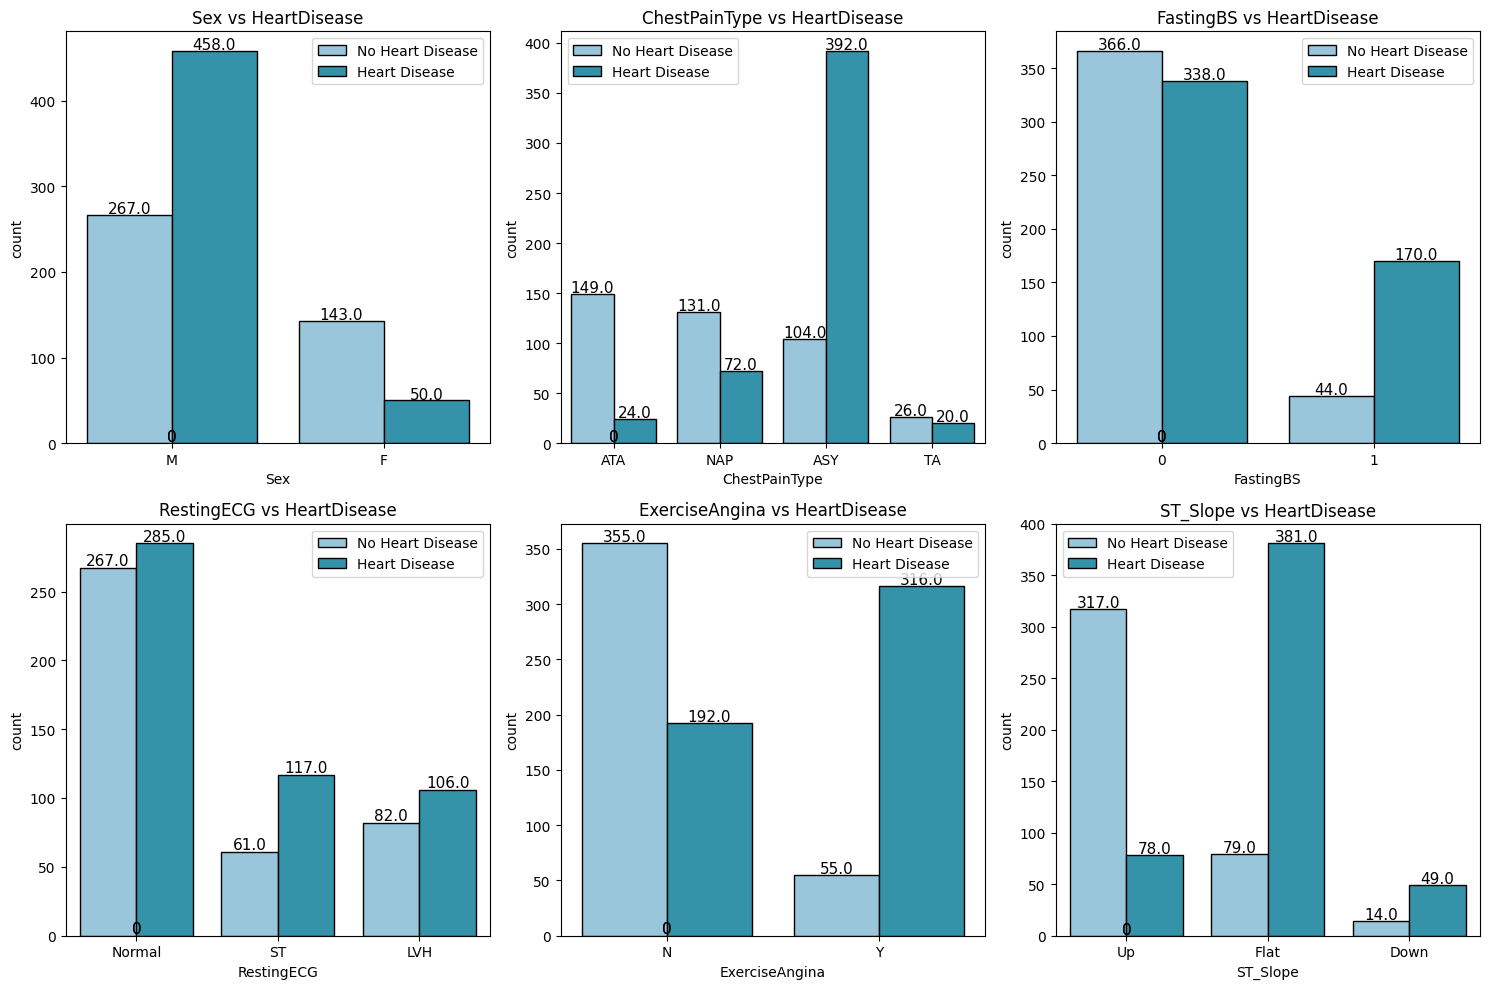

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(len(categorical_features) - 1):
    plt.subplot(2, 3, i + 1)
    countplot_ax = sns.countplot(x=categorical_features[i], data=df, hue="HeartDisease", palette=colors, edgecolor='black')
    
    for rect in countplot_ax.patches:
        countplot_ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                          horizontalalignment='center', fontsize=11)
    
    title = f"{categorical_features[i]} vs HeartDisease"
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

plt.tight_layout()
plt.show()

#### Numerical Features vs Target Variable (HeartDisease)

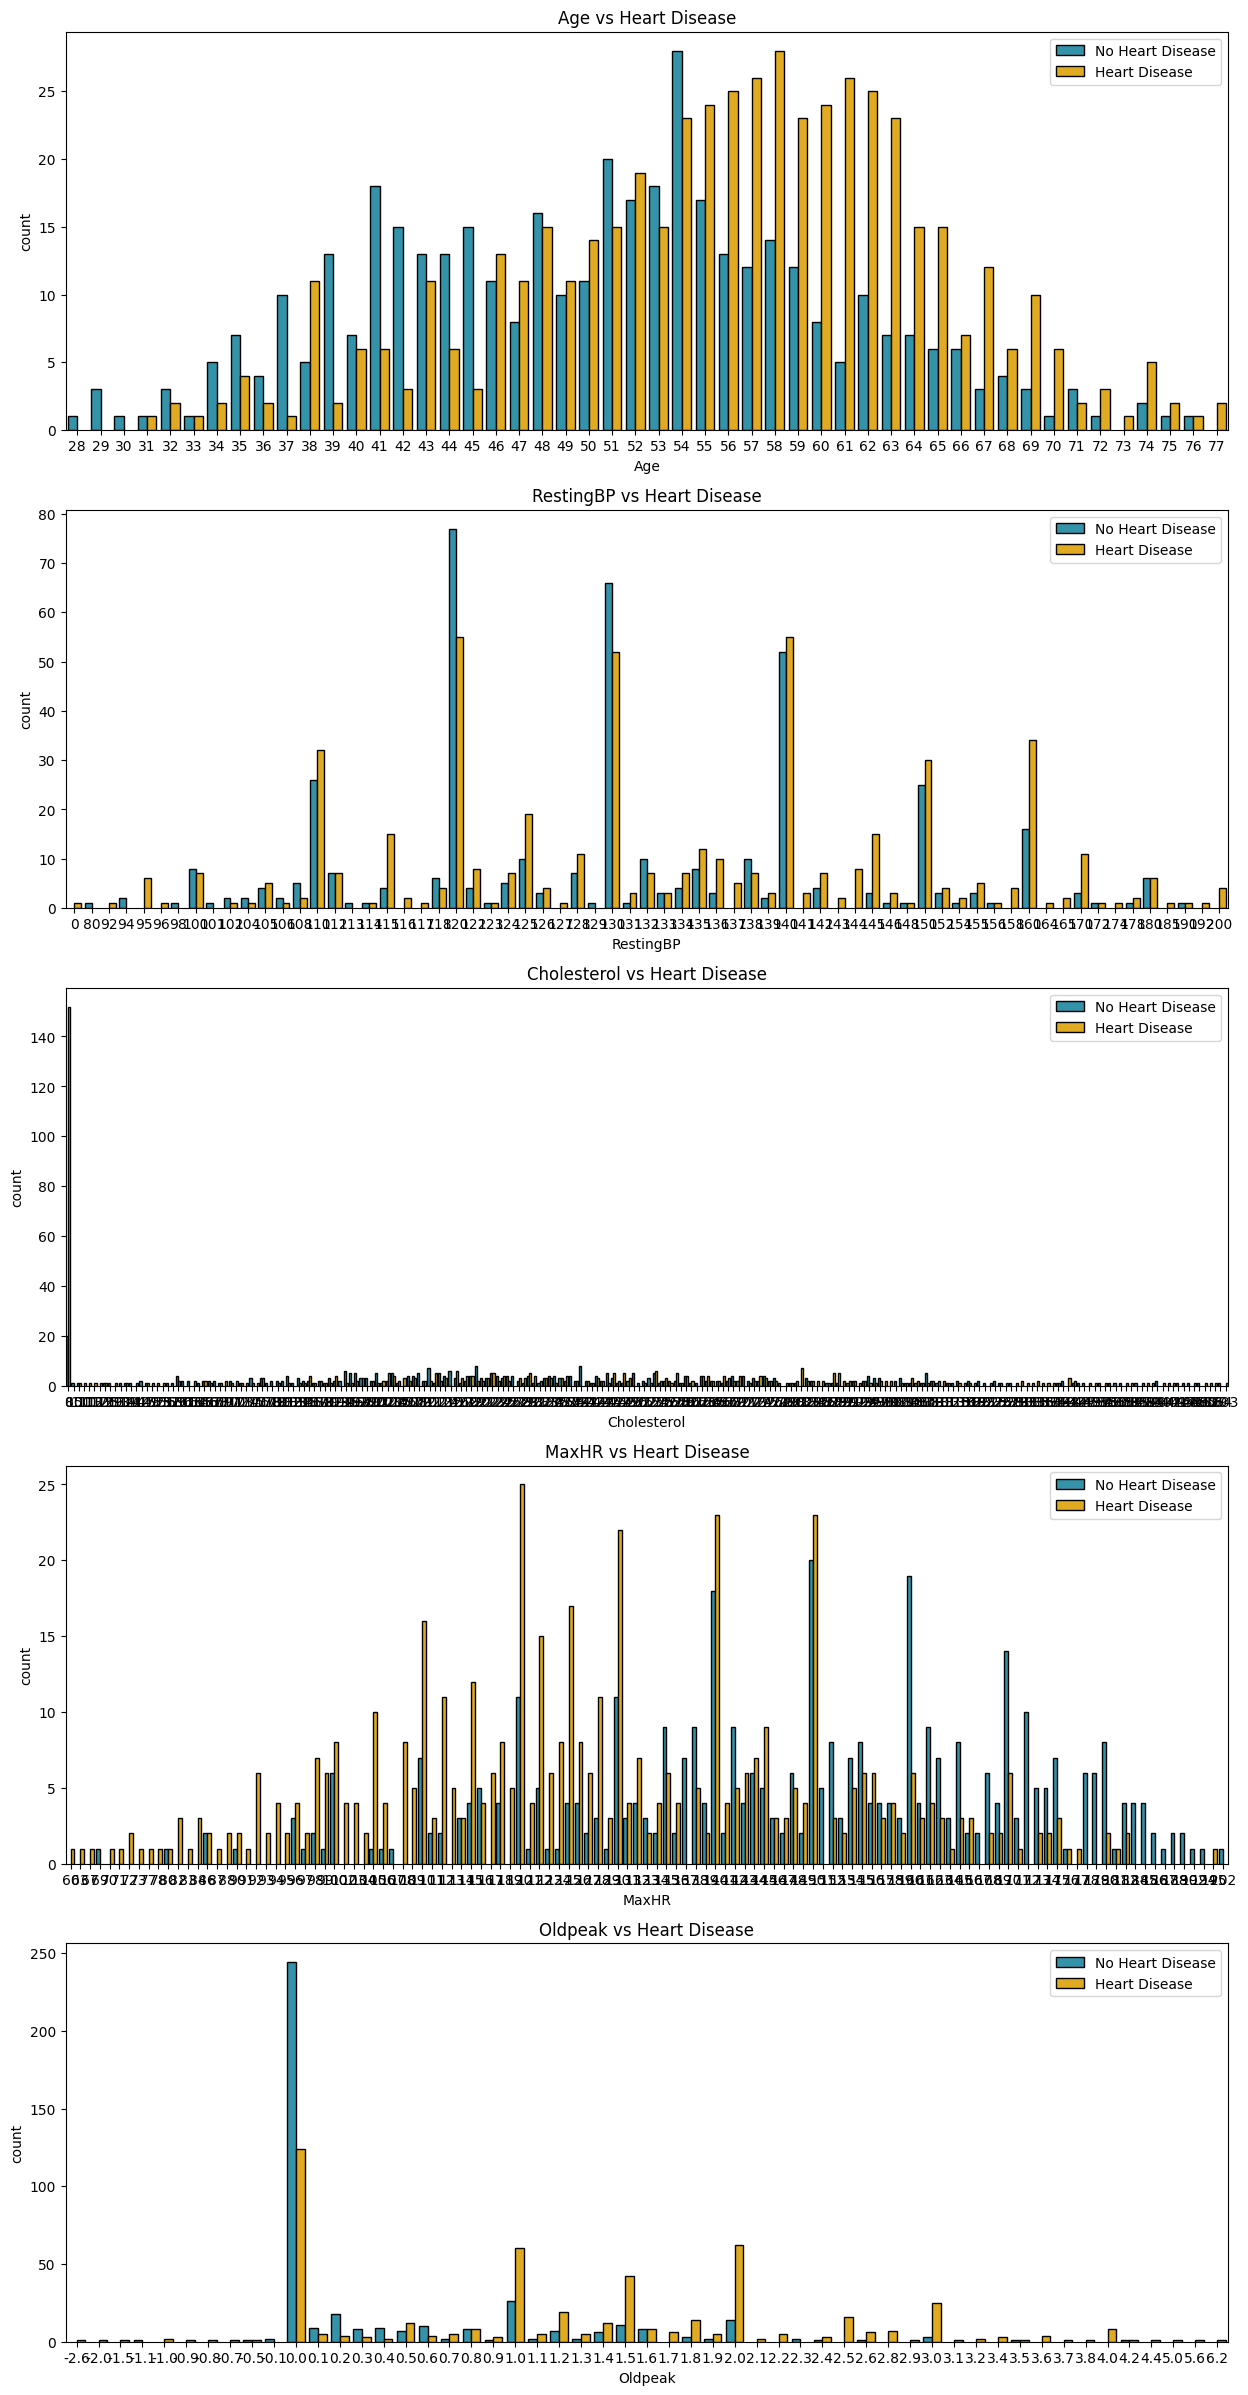

In [32]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x = numerical_features[i],data = df1,hue = "HeartDisease",palette = [colors[1], colors[3]], edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

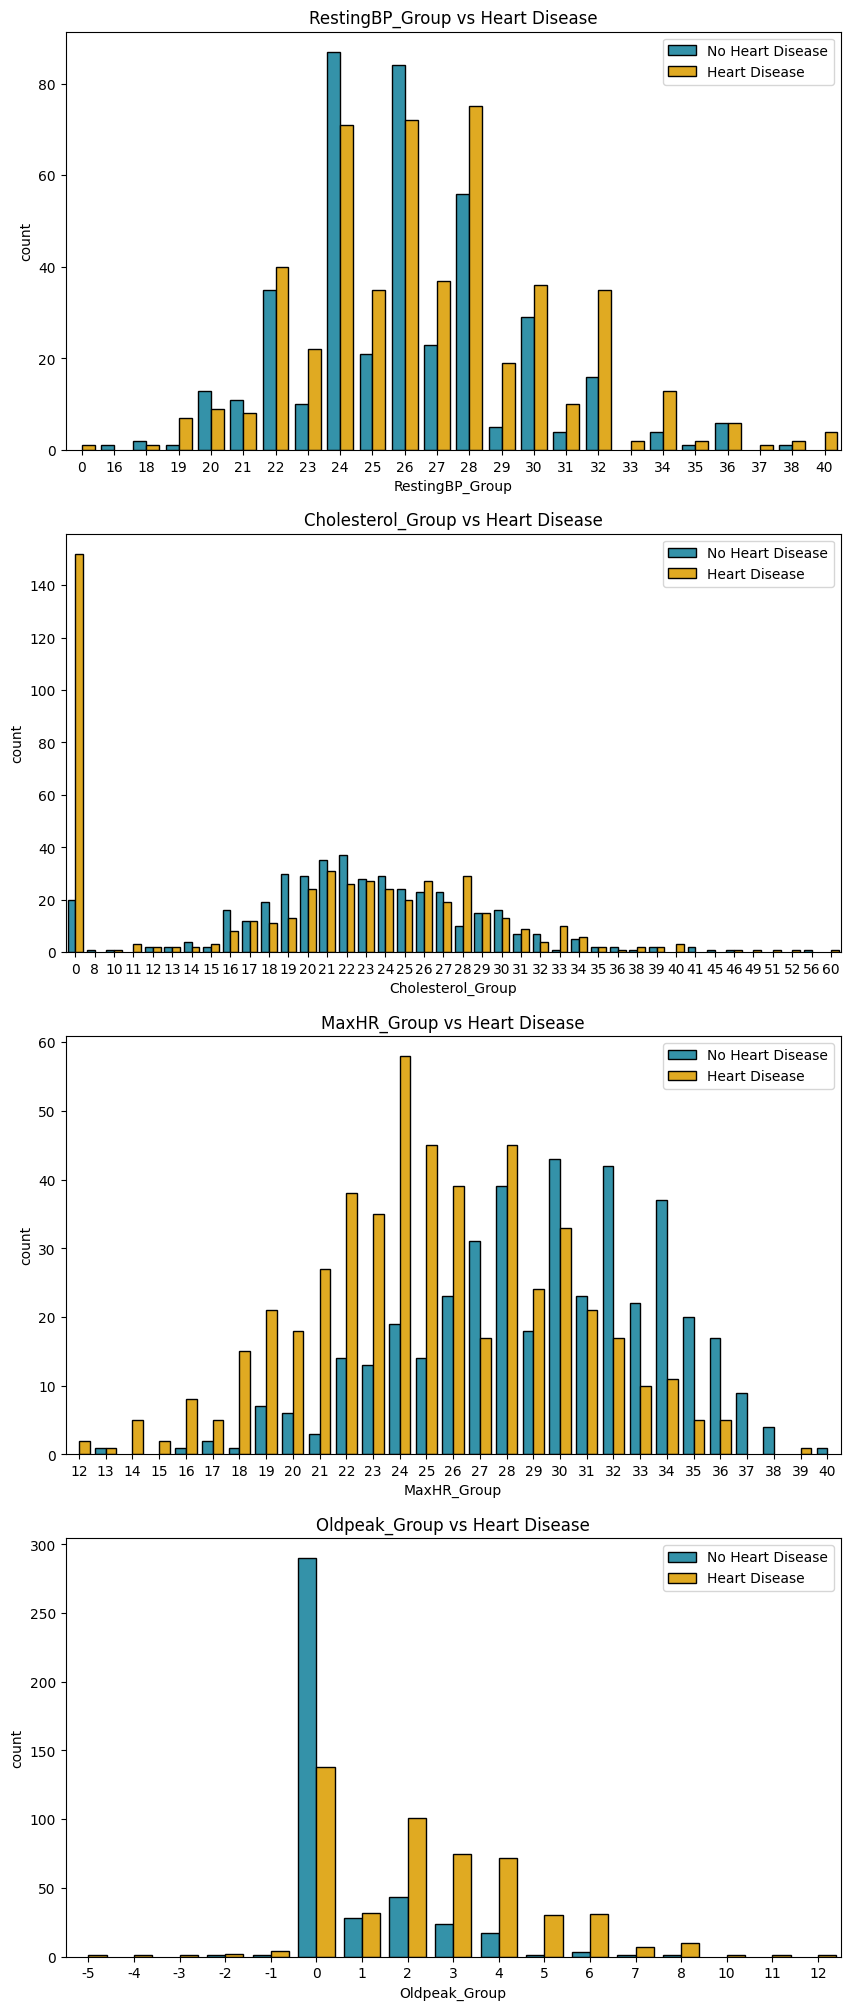

In [57]:
df2 = df1.copy(deep = True)

df2['RestingBP_Group'] = [ int(i / 5) for i in df2['RestingBP']]
df2['Cholesterol_Group'] = [ int(i / 10) for i in df2['Cholesterol']]
df2['MaxHR_Group'] = [ int(i / 5) for i in df2['MaxHR']]
df2['Oldpeak_Group'] = [ int( (i*10) / 5) for i in df2['Oldpeak']]

fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x = group_numerical_features[i],data = df2,hue = "HeartDisease",palette = [colors[1], colors[3]], edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);


#### Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

##### Sex vs Numerical Features :

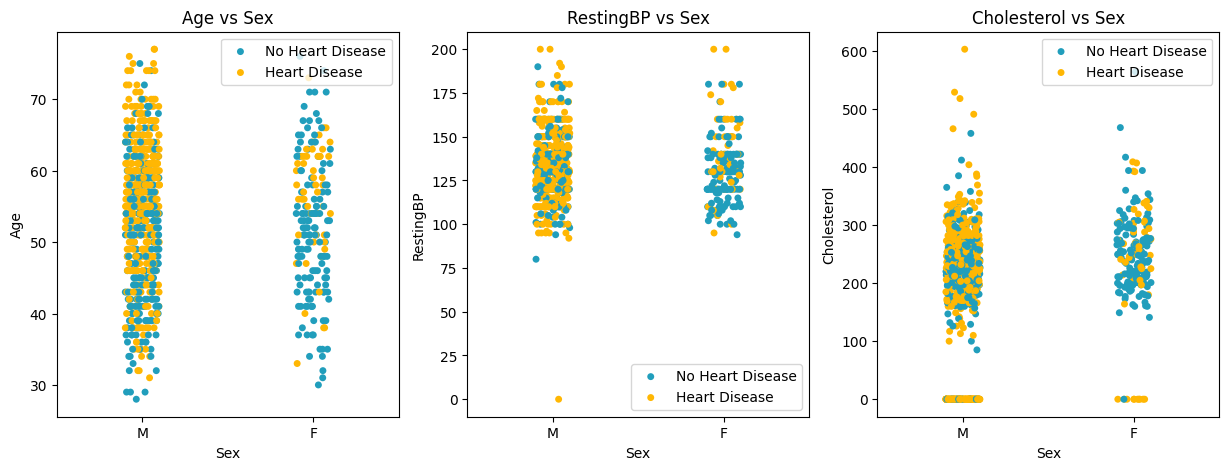

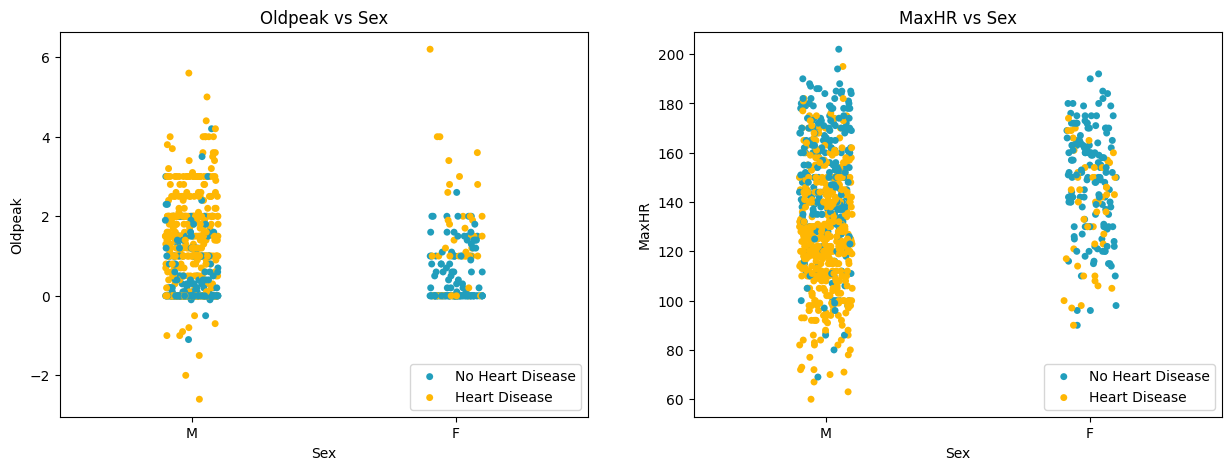

In [42]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

#### ChestPainType vs Numerical Features :

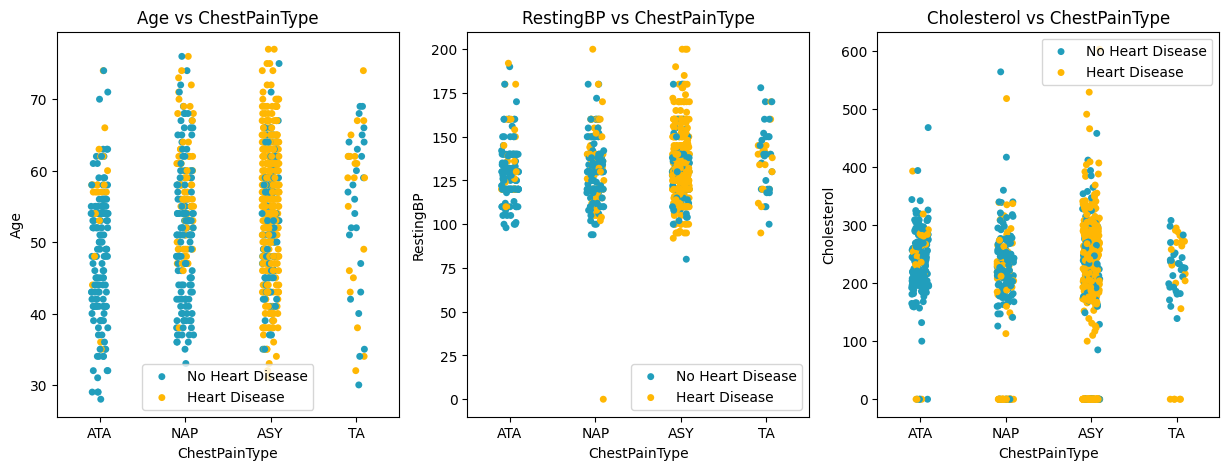

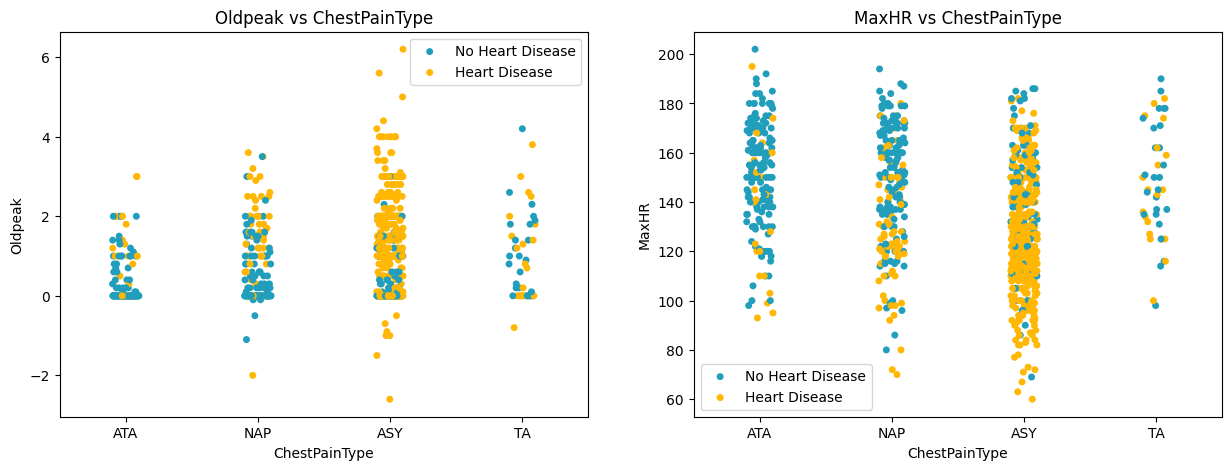

In [41]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

#### FastingBS vs Numerical features :

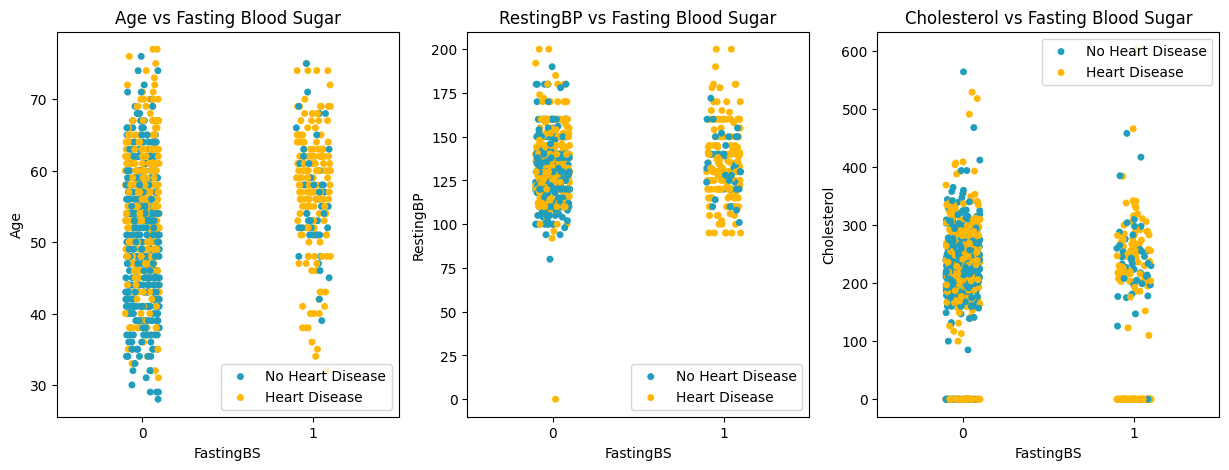

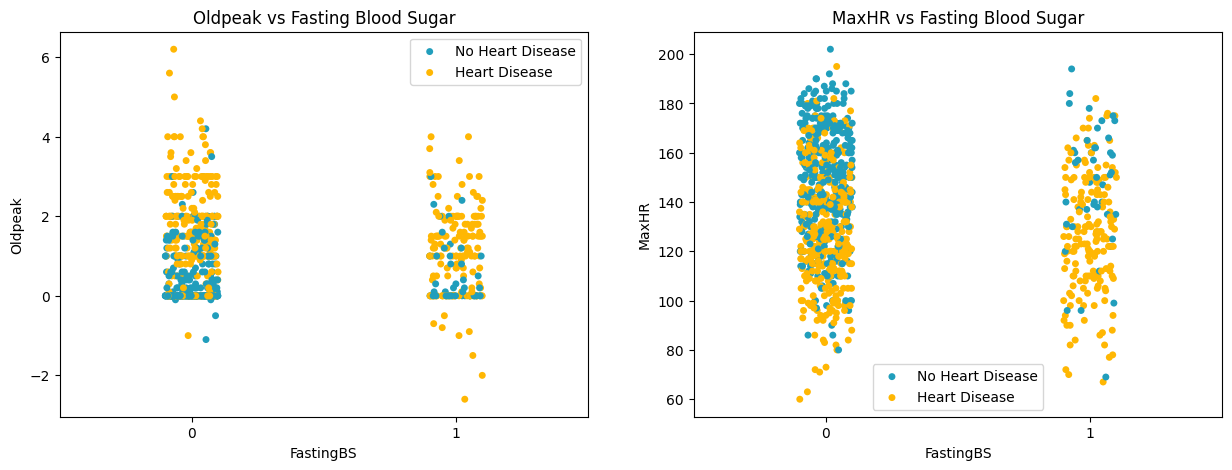

In [44]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

#### RestingECG vs Numerical Features :

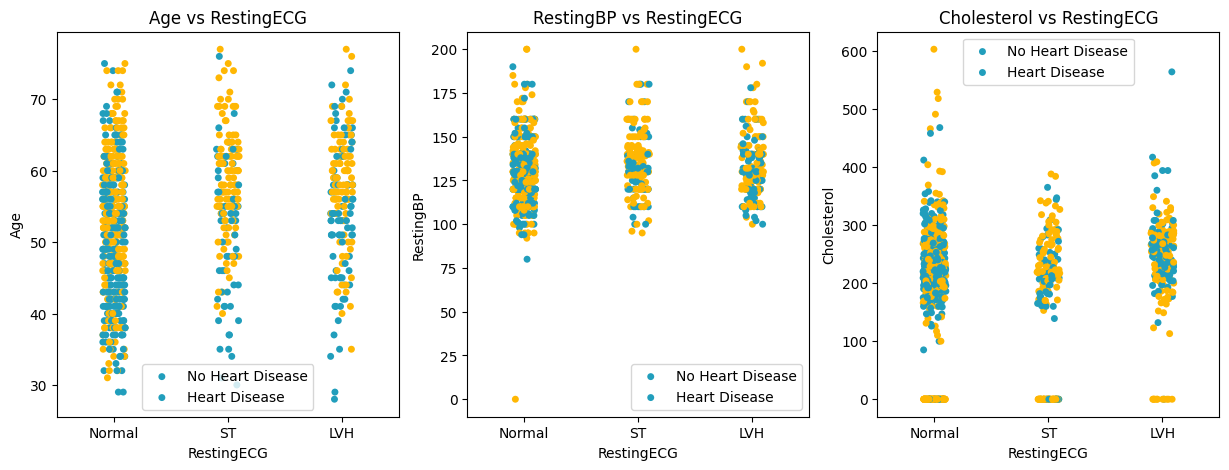

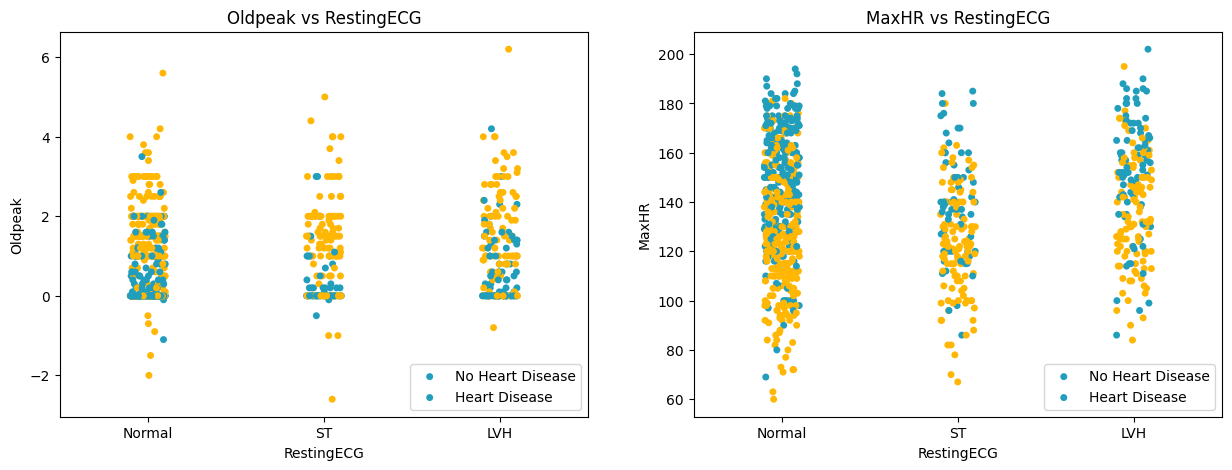

In [45]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

#### ExerciseAngina vs Numerical Features :

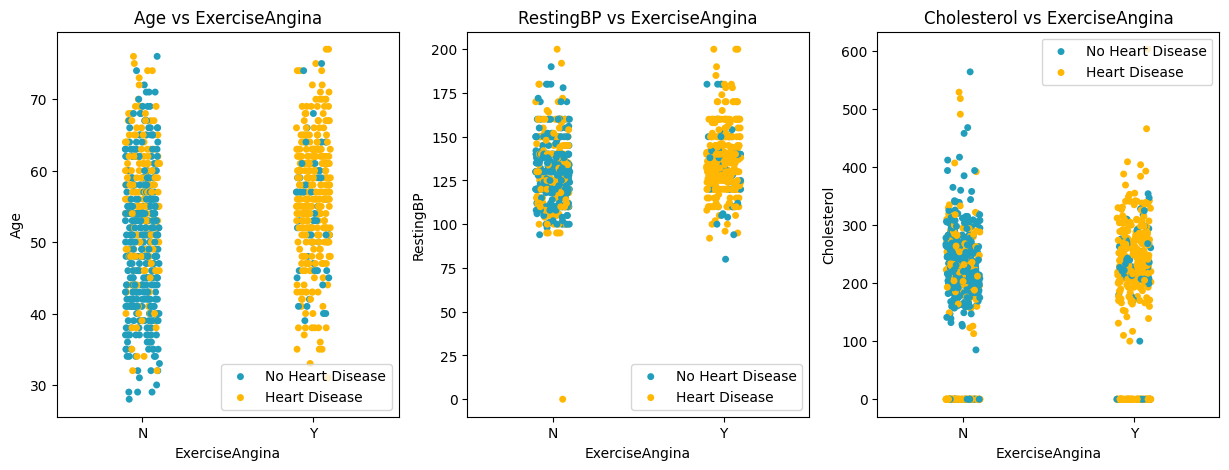

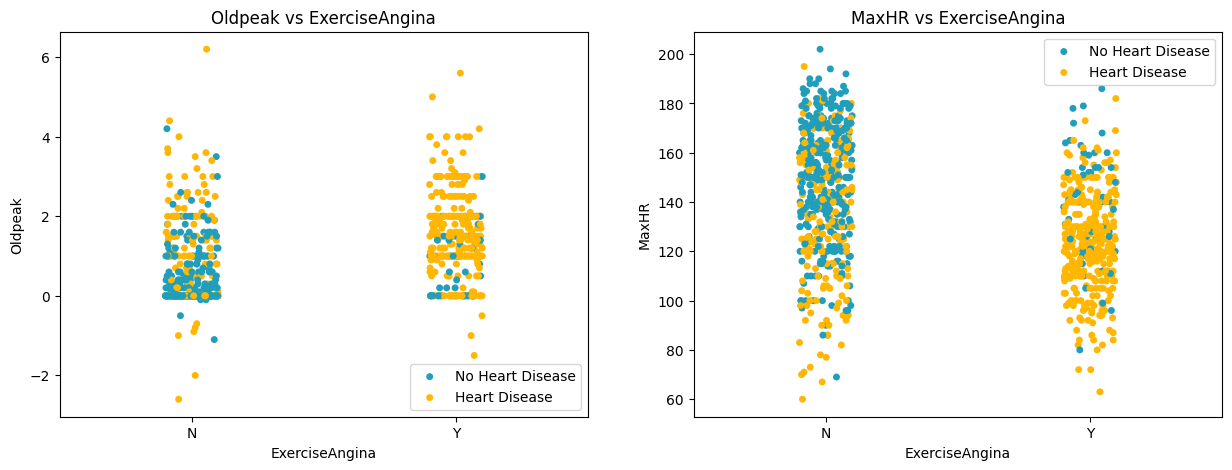

In [46]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title);

#### ST_Slope vs Numerical Features :

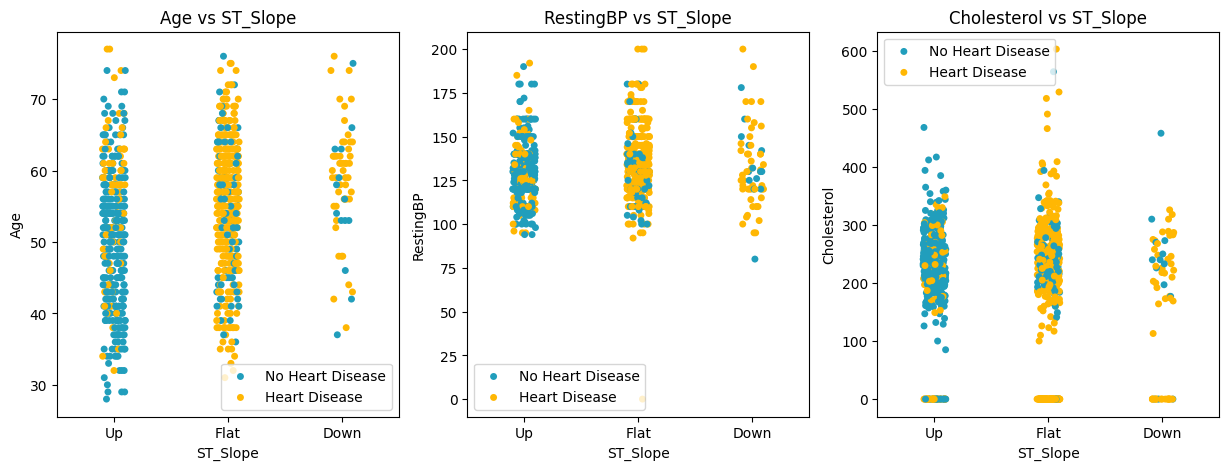

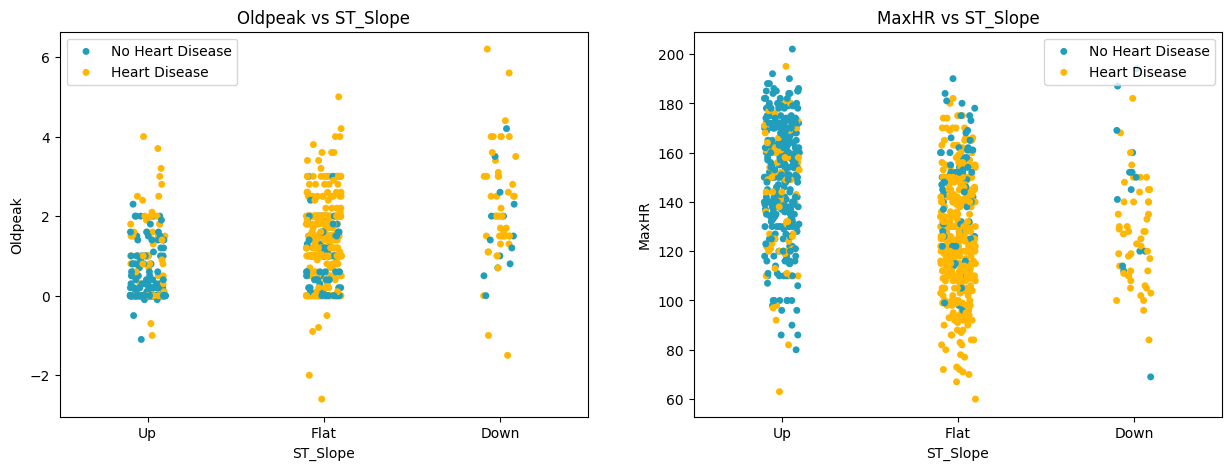

In [47]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]]);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

#### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

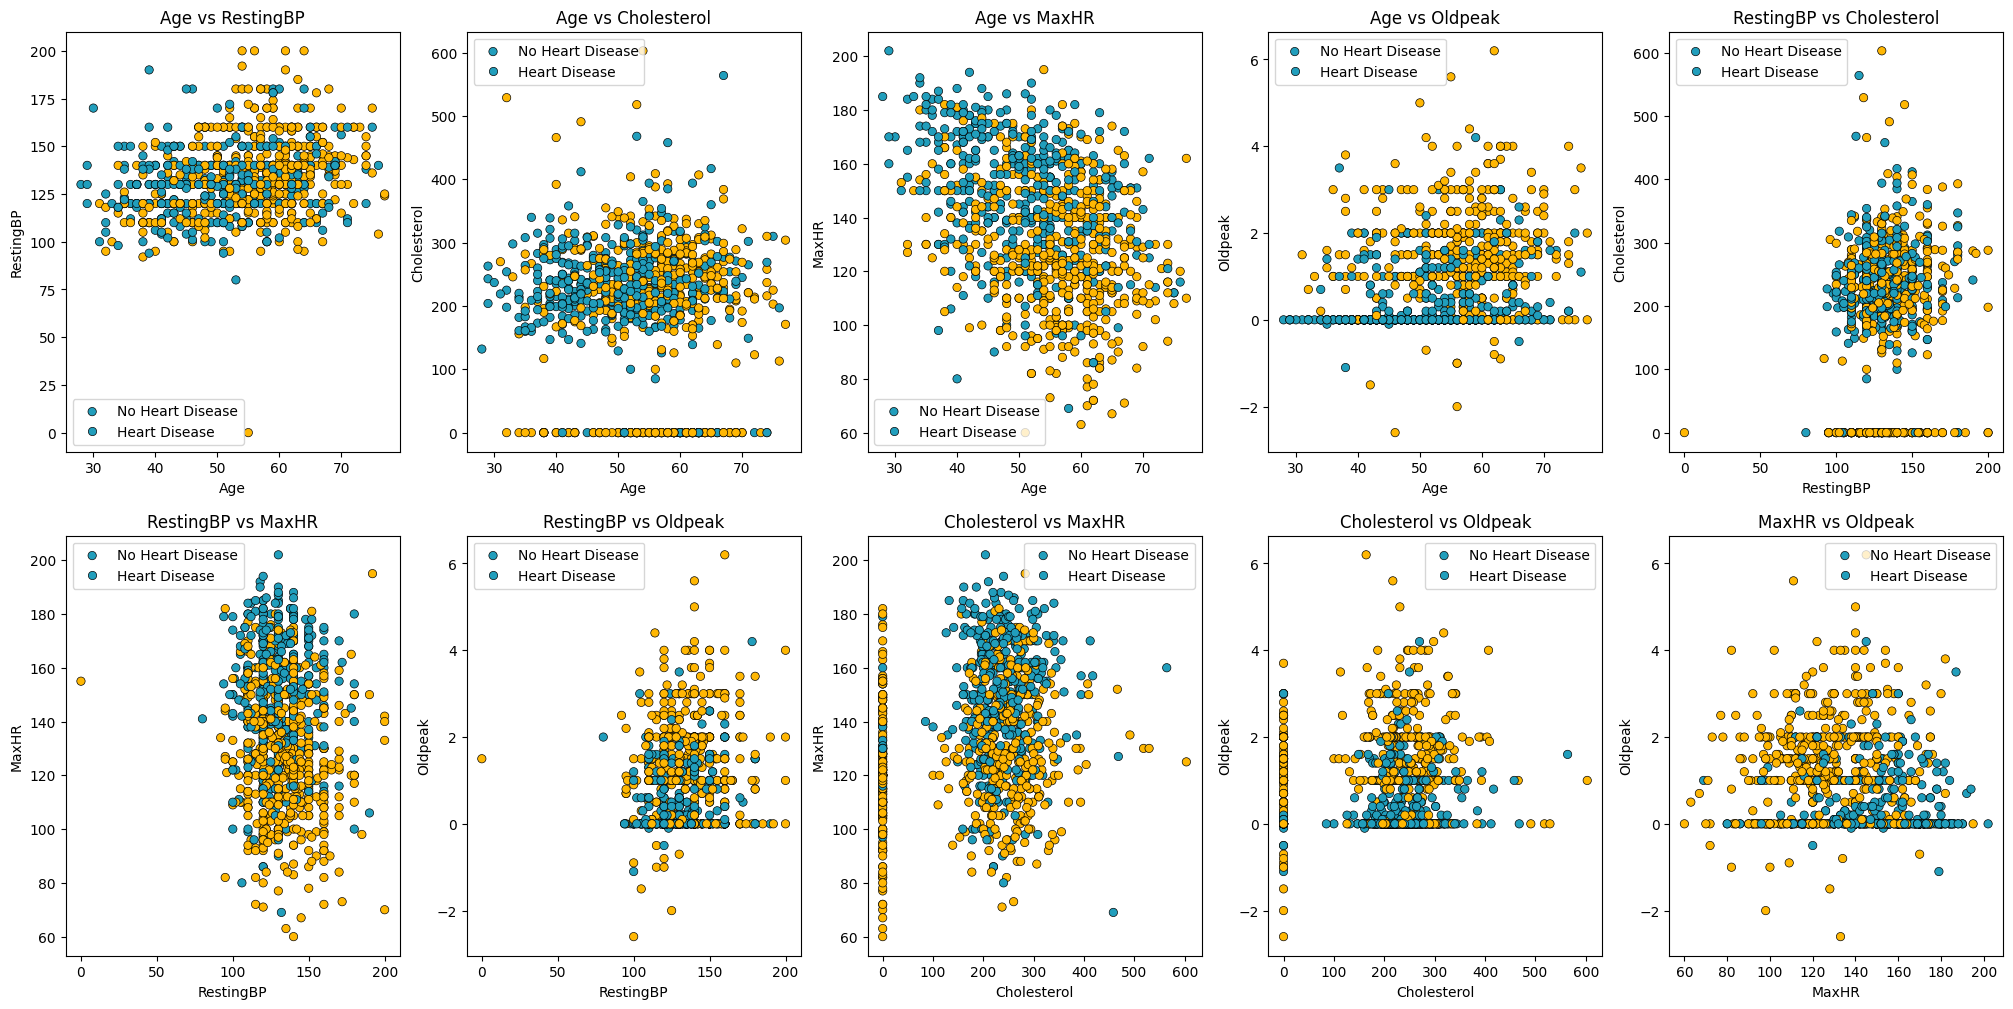

In [54]:
a = 0
fig,ax = plt.subplots(nrows = 2,ncols = 5,figsize = (25,12))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(2,5,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df,hue = 'HeartDisease',palette = [colors[1], colors[3]], edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

<span style="color: cyan;">

### FEATURE ENGINEERING
</span>

In [65]:
#Feature scaling and normalization.

# Normalization: For features that are not guassian distributed
# Standardization: For features that are guassian distributed

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


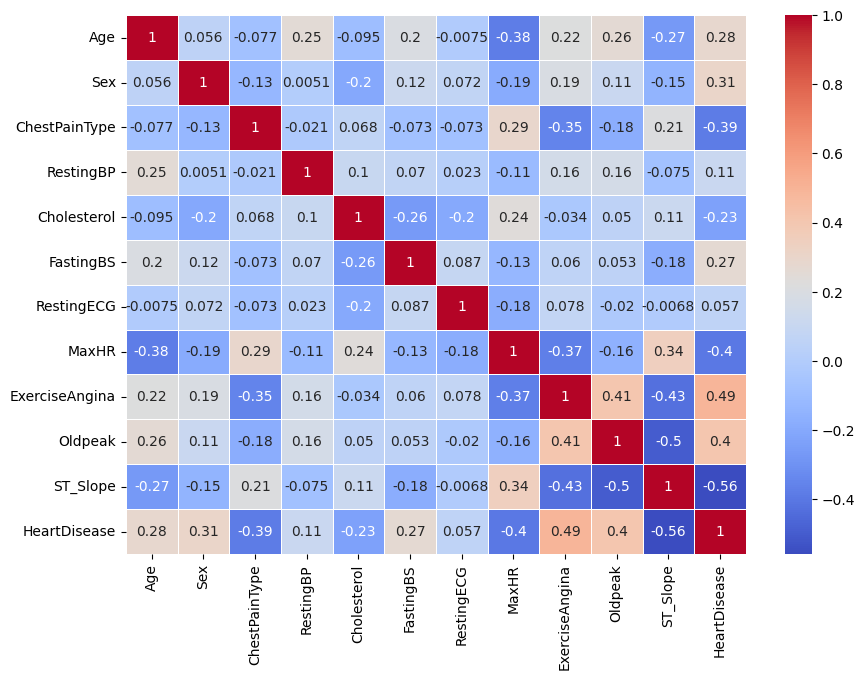

In [67]:
# Correlation plot

plt.figure(figsize = (10,7))
sns.heatmap(df1.corr(),cmap = 'coolwarm',annot = True, linewidths=0.5);

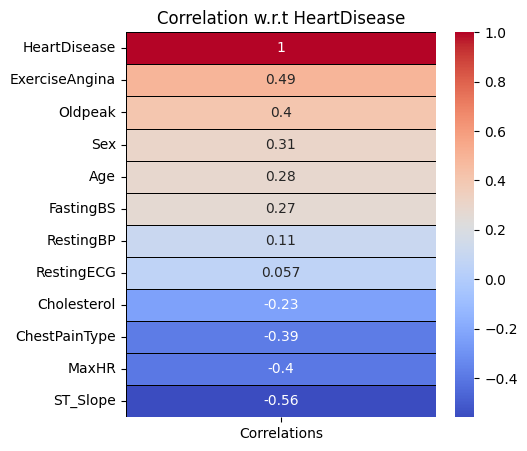

In [69]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');


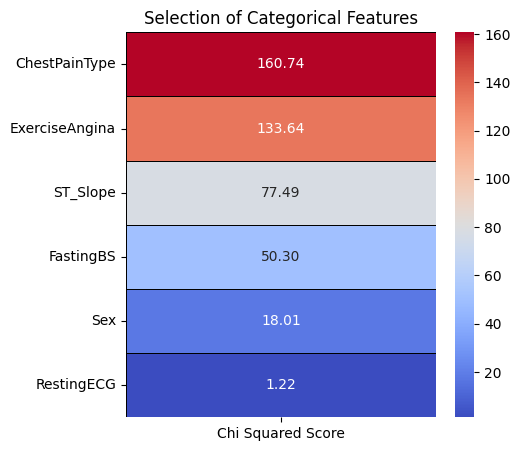

In [72]:
#chi test score for categorical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');



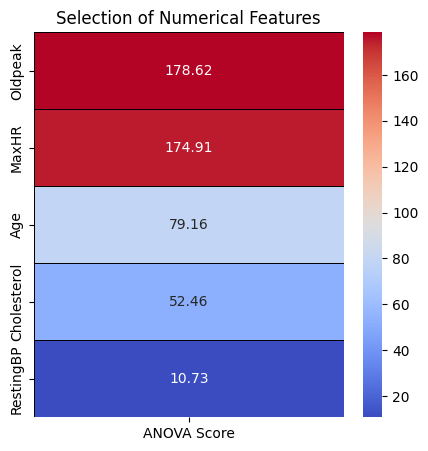

In [74]:
#ANOVA TEST FOR NUMERICAL FEATURES

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

<span style="color: cyan;">

### MODELING
</span>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve